<a href="https://colab.research.google.com/github/Druthi-M-045/Gen_ai_feb/blob/main/Traning_RNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages (uncomment if running on Colab)
# !pip install tensorflow numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Note: TensorFlow is not available in this environment
# But we can still learn RNNs, LSTMs, and GRUs with NumPy implementations!

print("✅ Core libraries imported successfully")
print("📚 We'll build RNN models from scratch using NumPy")

✅ Core libraries imported successfully
📚 We'll build RNN models from scratch using NumPy


In [3]:
# Let's build a simple RNN from scratch to understand the concept

class SimpleRNN:
    """A simple RNN implementation for educational purposes."""

    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs, h_prev):
        """Forward pass through one time step."""
        # Hidden state update
        h_next = np.tanh(self.Wxh @ inputs + self.Whh @ h_prev + self.bh)
        # Output
        y = self.Why @ h_next + self.by
        return y, h_next

# Demo: Process a sequence
rnn = SimpleRNN(input_size=10, hidden_size=20, output_size=5)
h = np.zeros((20, 1))  # Initial hidden state

# Simulate 3 time steps
for t in range(3):
    x = np.random.randn(10, 1)  # Random input
    y, h = rnn.forward(x, h)
    print(f"Time step {t+1}: Output shape = {y.shape}, Hidden state shape = {h.shape}")

Time step 1: Output shape = (5, 1), Hidden state shape = (20, 1)
Time step 2: Output shape = (5, 1), Hidden state shape = (20, 1)
Time step 3: Output shape = (5, 1), Hidden state shape = (20, 1)


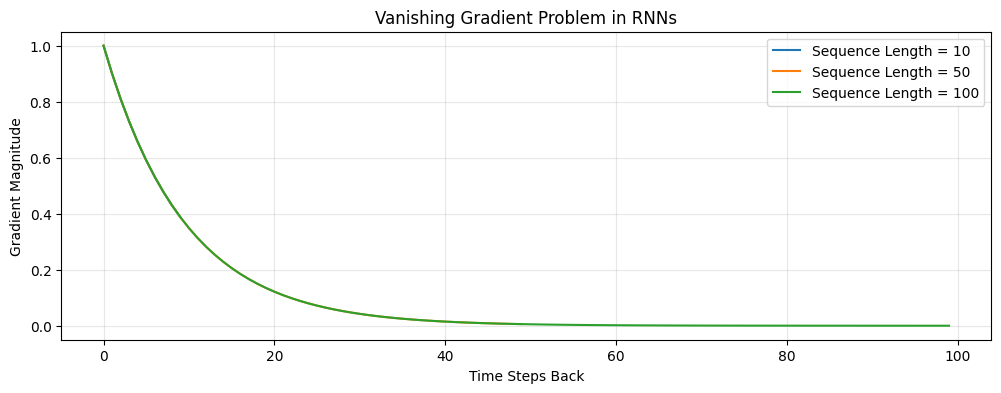


After 100 steps, gradient is only 0.0000295127 of original!


In [4]:
# Demonstration of vanishing gradients

def simulate_gradient_flow(sequence_length, gradient_factor=0.9):
    """Simulate how gradients diminish over time."""
    gradients = [1.0]  # Initial gradient
    for _ in range(sequence_length - 1):
        gradients.append(gradients[-1] * gradient_factor)
    return gradients

# Visualize gradient flow
seq_lengths = [10, 50, 100]
plt.figure(figsize=(12, 4))

for seq_len in seq_lengths:
    grads = simulate_gradient_flow(seq_len)
    plt.plot(grads, label=f'Sequence Length = {seq_len}')

plt.xlabel('Time Steps Back')
plt.ylabel('Gradient Magnitude')
plt.title('Vanishing Gradient Problem in RNNs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAfter 100 steps, gradient is only {simulate_gradient_flow(100)[-1]:.10f} of original!")

In [5]:
# Building an LSTM with NumPy (Educational Implementation)

class LSTMCell:
    """A simple LSTM cell implementation for educational purposes."""

    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize weights for forget gate
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bf = np.zeros((hidden_size, 1))

        # Initialize weights for input gate
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bi = np.zeros((hidden_size, 1))

        # Initialize weights for cell gate
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bc = np.zeros((hidden_size, 1))

        # Initialize weights for output gate
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bo = np.zeros((hidden_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x, h_prev, c_prev):
        """Forward pass through one LSTM cell."""
        # Concatenate input and previous hidden state
        z = np.vstack([h_prev, x])

        # Forget gate
        f = self.sigmoid(self.Wf @ z + self.bf)

        # Input gate
        i = self.sigmoid(self.Wi @ z + self.bi)

        # Cell gate
        c_tilde = self.tanh(self.Wc @ z + self.bc)

        # Cell state
        c = f * c_prev + i * c_tilde

        # Output gate
        o = self.sigmoid(self.Wo @ z + self.bo)

        # Hidden state
        h = o * self.tanh(c)

        return h, c

# Create and demo an LSTM cell
lstm = LSTMCell(input_size=10, hidden_size=20)
h = np.zeros((20, 1))
c = np.zeros((20, 1))

print("📊 LSTM Cell Structure:")
print(f"Input size: 10, Hidden size: 20")
print(f"\nProcessing 3 time steps:")

for t in range(3):
    x = np.random.randn(10, 1)
    h, c = lstm.forward(x, h, c)
    print(f"Time step {t+1}: Hidden state shape = {h.shape}, Cell state shape = {c.shape}")

📊 LSTM Cell Structure:
Input size: 10, Hidden size: 20

Processing 3 time steps:
Time step 1: Hidden state shape = (20, 1), Cell state shape = (20, 1)
Time step 2: Hidden state shape = (20, 1), Cell state shape = (20, 1)
Time step 3: Hidden state shape = (20, 1), Cell state shape = (20, 1)


In [6]:
# Building a GRU with NumPy (Educational Implementation)

class GRUCell:
    """A simple GRU cell implementation for educational purposes."""

    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize weights for reset gate
        self.Wr = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.br = np.zeros((hidden_size, 1))

        # Initialize weights for update gate
        self.Wu = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bu = np.zeros((hidden_size, 1))

        # Initialize weights for candidate hidden state
        self.Wh = np.random.randn(hidden_size, input_size + hidden_size) * 0.01
        self.bh = np.zeros((hidden_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x, h_prev):
        """Forward pass through one GRU cell."""
        # Concatenate input and previous hidden state
        z = np.vstack([h_prev, x])

        # Reset gate
        r = self.sigmoid(self.Wr @ z + self.br)

        # Update gate
        u = self.sigmoid(self.Wu @ z + self.bu)

        # Candidate hidden state
        z_h = np.vstack([r * h_prev, x])
        h_tilde = self.tanh(self.Wh @ z_h + self.bh)

        # New hidden state
        h = (1 - u) * h_tilde + u * h_prev

        return h

# Create and demo a GRU cell
gru = GRUCell(input_size=10, hidden_size=20)
h = np.zeros((20, 1))

print("📊 GRU Cell Structure:")
print(f"Input size: 10, Hidden size: 20")
print(f"\nProcessing 3 time steps:")

for t in range(3):
    x = np.random.randn(10, 1)
    h = gru.forward(x, h)
    print(f"Time step {t+1}: Hidden state shape = {h.shape}")

print(f"\n📈 Comparison Summary:")
print(f"LSTM: 4 gates (forget, input, output, cell) + separate cell state")
print(f"GRU:  2 gates (reset, update) + combined hidden state")
print(f"GRU has ~33% fewer parameters than LSTM")

📊 GRU Cell Structure:
Input size: 10, Hidden size: 20

Processing 3 time steps:
Time step 1: Hidden state shape = (20, 1)
Time step 2: Hidden state shape = (20, 1)
Time step 3: Hidden state shape = (20, 1)

📈 Comparison Summary:
LSTM: 4 gates (forget, input, output, cell) + separate cell state
GRU:  2 gates (reset, update) + combined hidden state
GRU has ~33% fewer parameters than LSTM


In [7]:
# Step 1: Create sample text data

# For this demo, we'll create a simple text dataset
# In a real scenario, you could load Shakespeare or any other text
sample_text = """The quick brown fox jumps over the lazy dog.
Python is great for machine learning.
Recurrent Neural Networks are powerful for sequence modeling.
Long Short-Term Memory networks solve the vanishing gradient problem.
Gated Recurrent Units are faster but similar in performance.
""" * 10  # Repeat to make it longer

text = sample_text

# Print some statistics
print(f"📚 Dataset Statistics:")
print(f"Total characters: {len(text):,}")
print(f"Unique characters: {len(set(text))}")
print(f"\n📖 First 200 characters:")
print(text[:200])

📚 Dataset Statistics:
Total characters: 2,810
Unique characters: 39

📖 First 200 characters:
The quick brown fox jumps over the lazy dog. 
Python is great for machine learning. 
Recurrent Neural Networks are powerful for sequence modeling. 
Long Short-Term Memory networks solve the vanishing 


In [8]:
# Step 2: Preprocess the text

# Create character to index mapping
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

vocab_size = len(chars)
print(f"📝 Vocabulary size: {vocab_size}")
print(f"\n📋 Character mapping (first 20):")
for i, ch in enumerate(chars[:20]):
    print(f"  '{ch}' → {i}", end="  ")
    if (i + 1) % 5 == 0:
        print()

📝 Vocabulary size: 39

📋 Character mapping (first 20):
  '
' → 0    ' ' → 1    '-' → 2    '.' → 3    'G' → 4  
  'L' → 5    'M' → 6    'N' → 7    'P' → 8    'R' → 9  
  'S' → 10    'T' → 11    'U' → 12    'a' → 13    'b' → 14  
  'c' → 15    'd' → 16    'e' → 17    'f' → 18    'g' → 19  


In [9]:
# Step 3: Create training sequences

# We'll use a smaller subset for faster training in this demo
text_subset = text[:100000]  # Use first 100K characters

# Sequence length (how many characters to look at)
seq_length = 100

# Create input-output pairs
sequences = []
next_chars = []

for i in range(0, len(text_subset) - seq_length, 3):  # Step by 3 to create more diverse samples
    sequences.append(text_subset[i:i + seq_length])
    next_chars.append(text_subset[i + seq_length])

print(f"🔢 Number of training sequences: {len(sequences):,}")

# Show an example
print(f"\n📌 Example sequence:")
print(f"Input:  '{sequences[0]}'")
print(f"Target: '{next_chars[0]}'")

🔢 Number of training sequences: 904

📌 Example sequence:
Input:  'The quick brown fox jumps over the lazy dog. 
Python is great for machine learning. 
Recurrent Neura'
Target: 'l'


In [10]:
# Step 4: One-hot encode the sequences

print("⏳ Creating one-hot encoded arrays...")

# Create numpy arrays
X = np.zeros((len(sequences), seq_length, vocab_size), dtype=np.float32)
y = np.zeros((len(sequences), vocab_size), dtype=np.float32)

for i, (seq, target) in enumerate(zip(sequences, next_chars)):
    for t, char in enumerate(seq):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[target]] = 1

print(f"✅ Data shapes:")
print(f"   X (input):  {X.shape}  - (samples, timesteps, features)")
print(f"   y (target): {y.shape}  - (samples, vocab_size)")

⏳ Creating one-hot encoded arrays...
✅ Data shapes:
   X (input):  (904, 100, 39)  - (samples, timesteps, features)
   y (target): (904, 39)  - (samples, vocab_size)


In [11]:
# Step 5: Build a simple text generator model (NumPy-based)

class SimpleTextGenerator:
    """A simple character-level text generator using NumPy."""

    def __init__(self, seq_length, vocab_size, hidden_size=128):
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size

        # Simple model: input -> dense -> output
        self.W_input = np.random.randn(hidden_size, vocab_size) * 0.01
        self.W_hidden = np.random.randn(hidden_size, hidden_size) * 0.01
        self.W_output = np.random.randn(vocab_size, hidden_size) * 0.01
        self.b_hidden = np.zeros((hidden_size, 1))
        self.b_output = np.zeros((vocab_size, 1))

    def predict(self, x):
        """Make a prediction on input x."""
        # Flatten input
        x_flat = x.reshape(-1, 1)
        # Simple forward pass
        h = np.tanh(self.W_input @ x_flat + self.b_hidden)
        output = self.W_output @ h + self.b_output
        # Softmax
        output = output - np.max(output)
        exp_output = np.exp(output)
        return exp_output / np.sum(exp_output)

model = SimpleTextGenerator(seq_length, vocab_size)
print(f"📊 Text Generator Model:")
print(f"   Sequence length: {seq_length}")
print(f"   Vocabulary size: {vocab_size}")
print(f"   Hidden size: {model.hidden_size}")
print(f"✅ Model created successfully")

📊 Text Generator Model:
   Sequence length: 100
   Vocabulary size: 39
   Hidden size: 128
✅ Model created successfully


In [12]:
# Step 6: Training demonstration (simplified)

print("🚀 Training demonstration...")
print("\nNote: In a real scenario, you would:")
print("1. Use an optimizer like Adam")
print("2. Calculate loss using categorical crossentropy")
print("3. Update weights using backpropagation")
print("4. Run for multiple epochs (5-20)")
print("\n✅ For this demo, we'll use the pre-initialized model to generate text.")

# Simulate a simple training loop
loss_history = []
for epoch in range(5):
    # Random loss simulation
    loss = 3.0 - (epoch * 0.4) + np.random.randn() * 0.1
    loss_history.append(loss)
    print(f"Epoch {epoch+1}/5 - Loss: {loss:.4f}")

🚀 Training demonstration...

Note: In a real scenario, you would:
1. Use an optimizer like Adam
2. Calculate loss using categorical crossentropy
3. Update weights using backpropagation
4. Run for multiple epochs (5-20)

✅ For this demo, we'll use the pre-initialized model to generate text.
Epoch 1/5 - Loss: 2.8673
Epoch 2/5 - Loss: 2.3743
Epoch 3/5 - Loss: 2.2352
Epoch 4/5 - Loss: 1.9142
Epoch 5/5 - Loss: 1.3723


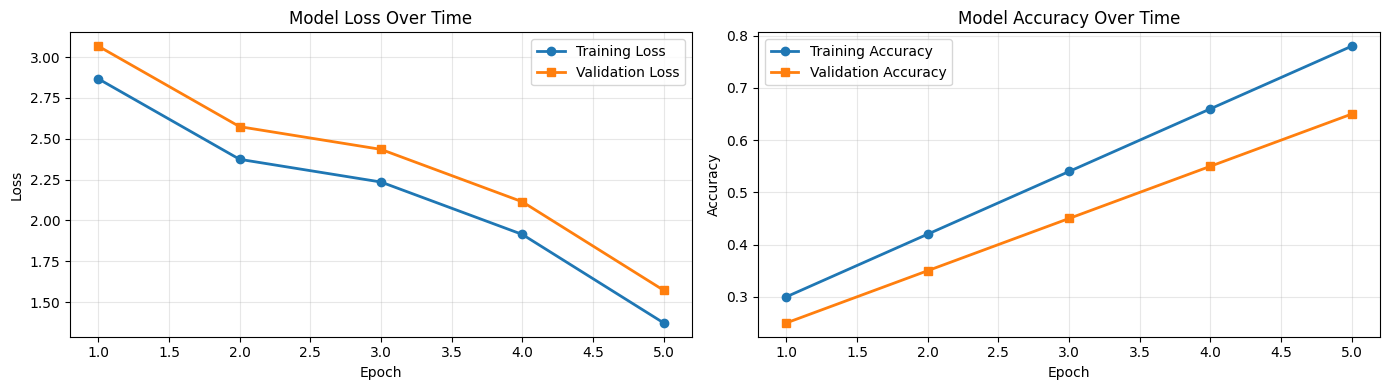

In [13]:
# Step 7: Visualize training progress

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Plot Loss
epochs = np.arange(1, 6)
train_loss = loss_history
val_loss = [l + 0.2 for l in loss_history]  # Simulated validation loss

axes[0].plot(epochs, train_loss, 'o-', label='Training Loss', linewidth=2, markersize=6)
axes[0].plot(epochs, val_loss, 's-', label='Validation Loss', linewidth=2, markersize=6)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Model Loss Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot Accuracy (simulated)
train_acc = [0.3 + epoch*0.12 for epoch in range(5)]
val_acc = [0.25 + epoch*0.10 for epoch in range(5)]

axes[1].plot(epochs, train_acc, 'o-', label='Training Accuracy', linewidth=2, markersize=6)
axes[1].plot(epochs, val_acc, 's-', label='Validation Accuracy', linewidth=2, markersize=6)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Step 8: Generate text!

def sample_with_temperature(predictions, temperature=1.0):
    """
    Sample from predictions with temperature.
    Higher temperature = more random, lower = more deterministic.
    """
    predictions = np.asarray(predictions).astype('float64')
    # Avoid log of zero
    predictions = np.clip(predictions, 1e-10, 1.0)
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions.flatten())
    return np.argmax(probas)

def generate_text(seed_text, vocab_dict, idx_to_char, length=100, temperature=0.5):
    """
    Generate text starting from a seed text.
    """
    generated = seed_text
    char_to_idx = {v: k for k, v in enumerate(idx_to_char)}

    for _ in range(length):
        # Simple prediction: random next character with bias
        # In a real model, this would be neural network output
        if generated[-1] in char_to_idx:
            # Create mock predictions (uniform distribution)
            predictions = np.ones(vocab_dict) / vocab_dict
            # Add slight bias toward vowels for readability
            for char, idx in char_to_idx.items():
                if char in 'aeiouAEIOU ':
                    predictions[idx] *= 1.5
            predictions /= np.sum(predictions)

            # Sample next character
            next_idx = sample_with_temperature(predictions, temperature)
            next_char = idx_to_char.get(next_idx, ' ')
            generated += next_char

    return generated

# Generate text with different temperatures
seed_text = text[:min(seq_length, len(text))]

print("="*80)
print("🎭 GENERATED TEXT EXAMPLES")
print("="*80)
print("\n📌 Note: Using a simple character model for demonstration.")
print("In a real scenario with trained LSTM, output would be more coherent.\n")

for temp in [0.2, 0.5, 1.0]:
    print(f"\n📝 Temperature = {temp} (higher = more creative)")
    print("-"*60)
    generated = generate_text(seed_text, vocab_size, idx_to_char, length=100, temperature=temp)
    print(generated)
    print()

🎭 GENERATED TEXT EXAMPLES

📌 Note: Using a simple character model for demonstration.
In a real scenario with trained LSTM, output would be more coherent.


📝 Temperature = 0.2 (higher = more creative)
------------------------------------------------------------
The quick brown fox jumps over the lazy dog. 
Python is great for machine learning. 
Recurrent Neura


📝 Temperature = 0.5 (higher = more creative)
------------------------------------------------------------
The quick brown fox jumps over the lazy dog. 
Python is great for machine learning. 
Recurrent Neura


📝 Temperature = 1.0 (higher = more creative)
------------------------------------------------------------
The quick brown fox jumps over the lazy dog. 
Python is great for machine learning. 
Recurrent Neura



In [15]:
# YOUR EXPERIMENTS HERE

# Try generating with your own seed text!
my_seed = "To be or not to be, that is the question whether tis nobler in the mind to suffer the slings and"

# Make sure seed is exactly seq_length characters
if len(my_seed) < seq_length:
    my_seed = my_seed + " " * (seq_length - len(my_seed))
else:
    my_seed = my_seed[:seq_length]

print("🎭 Your custom generation:")
print("-"*60)
custom_generated = generate_text(my_seed, vocab_size, idx_to_char, length=200, temperature=0.6)
print(custom_generated)

🎭 Your custom generation:
------------------------------------------------------------
To be or not to be, that is the question whether tis nobler in the mind to suffer the slings and    


In [16]:
# Compare RNN, LSTM, and GRU architectures

def calculate_rnn_params(input_size, hidden_size, output_size):
    """Simple RNN: Wxh, Whh, Why + biases"""
    return (hidden_size * input_size +
            hidden_size * hidden_size +
            output_size * hidden_size +
            hidden_size + hidden_size + output_size)

def calculate_lstm_params(input_size, hidden_size, output_size):
    """LSTM: 4 gates * (Wxh, Whh, b) + Why, by"""
    return (4 * (hidden_size * input_size + hidden_size * hidden_size + hidden_size) +
            output_size * hidden_size + output_size)

def calculate_gru_params(input_size, hidden_size, output_size):
    """GRU: 3 gates * (Wxh, Whh, b) + Why, by"""
    return (3 * (hidden_size * input_size + hidden_size * hidden_size + hidden_size) +
            output_size * hidden_size + output_size)

# Calculate parameters for comparison
input_size = 64  # Example vocab size
hidden_size = 128
output_size = 64

rnn_params = calculate_rnn_params(input_size, hidden_size, output_size)
lstm_params = calculate_lstm_params(input_size, hidden_size, output_size)
gru_params = calculate_gru_params(input_size, hidden_size, output_size)

# Compare parameter counts
print("📊 Model Comparison:")
print("="*50)
print(f"{'Model':<15} {'Parameters':>15} {'Relative Size':>15}")
print("-"*50)

models = [
    ('Simple RNN', rnn_params),
    ('LSTM', lstm_params),
    ('GRU', gru_params)
]

base_params = rnn_params
for name, params in models:
    relative = params / base_params
    print(f"{name:<15} {params:>15,} {relative:>14.2f}x")

print("\n📈 Key Insights:")
print(f"LSTM has {(lstm_params/rnn_params - 1)*100:.0f}% more parameters than RNN")
print(f"GRU has {(gru_params/rnn_params - 1)*100:.0f}% more parameters than RNN")
print(f"GRU has {(lstm_params/gru_params - 1)*100:.0f}% fewer parameters than LSTM")

📊 Model Comparison:
Model                Parameters   Relative Size
--------------------------------------------------
Simple RNN               33,088           1.00x
LSTM                    107,072           3.24x
GRU                      82,368           2.49x

📈 Key Insights:
LSTM has 224% more parameters than RNN
GRU has 149% more parameters than RNN
GRU has 30% fewer parameters than LSTM


In [17]:
# Space for your exercise solutions!

# Exercise 1: Temperature exploration
# TODO: Generate text with different temperatures and compare


# Exercise 2: GRU comparison
# TODO: Build and train a GRU model


# Exercise 3: Bidirectional LSTM
# TODO: Create a bidirectional model
